[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
The accuracy score of k-mean: 0.8933333333333333
The confusion matrix of k-mean: [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


array([[ 0, 50,  0],
       [ 5,  0, 45],
       [50,  0,  0]], dtype=int64)

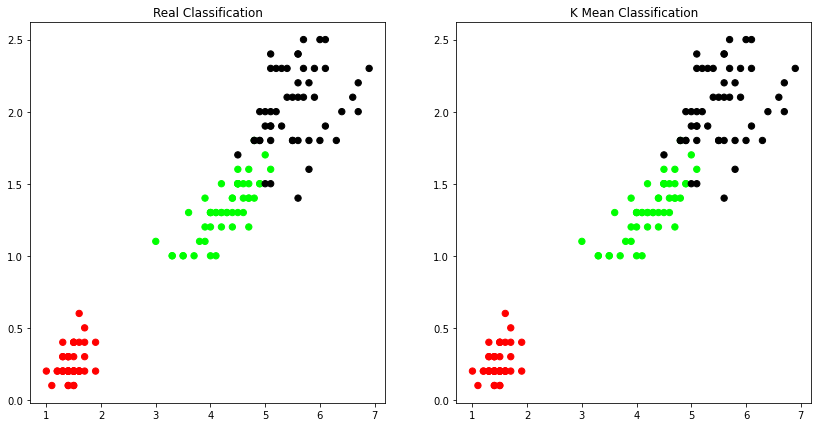

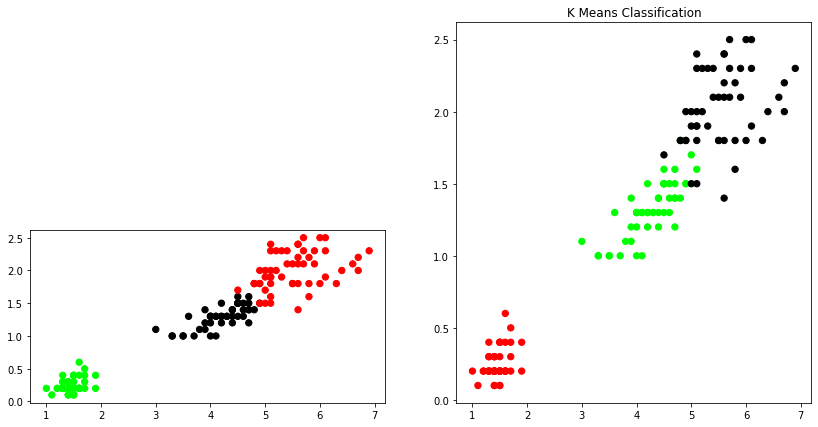

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
%matplotlib inline

iris=datasets.load_iris()
x=pd.DataFrame(iris.data)
x.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(iris.target)
y.columns=['Targets']

# K Means Cluster
model=KMeans(n_clusters=3)
model.fit(x)
model.labels_

#view the results
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])
plt.subplot(1,2,1)
plt.scatter(x.Petal_Length,x.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real Classification')

plt.subplot(1,2,2)
plt.scatter(x.Petal_Length,x.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('K Mean Classification')
plt.figure(figsize=(14,7))


predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)
print(predY)

plt.subplot(1,2,1)
plt.scatter(x.Petal_Length,x.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real Classification')
plt.subplot(1,2,2)
plt.scatter(x.Petal_Length,x.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('K Means Classification')

print('The accuracy score of k-mean:',sm.accuracy_score(y,model.labels_))
print('The confusion matrix of k-mean:',sm.confusion_matrix(y,model.labels_))

from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
scaler.fit(x)
xsa=scaler.transform(x)
xs=pd.DataFrame(xsa,columns=x.columns)

from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)

y_cluster_gmm=gmm.predict(xs)

plt.subplot(2,2,3)
plt.scatter(x.Petal_Length,x.Petal_Width,c=colormap[y_cluster_gmm],s=40)

sm.accuracy_score(y,y_cluster_gmm)
sm.confusion_matrix(y,y_cluster_gmm)